https://workingwithpython.com/pythoncohortanalysis/
"우리 홈페이지를 계속적으로 이용하고 있는가?" 
"우리 앱을 설치한 이후, 계속적으로 이용하고 있는가?"
<사용자 유지율>

#코호트:특정 기간에 특정의 경험을 공유한 집단 간의 행동 패턴 비교 분석
#ex) 첫 구매 일자가 동일한 고객 그룹
퍼널:유입되어 결제로 이어지는 일련의 과정
퍼널 분석이란, 웹 사이트에 유입된 사용자가 '전환(Conversion)'에 이르기까지의 여정을 흐름대로 시각화하여 어떤 단계에서 가장 많이 이탈하는지를 알아보기 위한 방법
잠재 고객을 자사로 ‘유입’시켜, 최종적으로는 ‘결제’하도록 만드는 모델

RFM 분석(Recency, Frequency, Monetary): 가치있는 고객을 추출해내어 이를 기준으로 고객을 분류할 수 있는 매우 간단하면서도 유용하게 사용될 수 있는 방법
Recency : 얼마나 최근에 구매했는가		ex) 2021-01-01일 기준으로 최근 한달 이내에 결제되었는가
Frequency : 얼마나 자주 구매했는가		ex) 5개 이상 주문하였는가
Monetary : 얼마나 많은 금액을 지출했는가	ex) 500달러 이상 주문하였는가
새로운 제안에 응답할 가능성이 가장 높은 기존 고객을 식별하는 데 사용되는 방법
사용자들의 성별, 나이 등의 인구통계학적 정보로 리스트를 추출하는 방식
사용자의 행동 패턴을 통해 리스트를 추출하는 방식
서비스 내에 정해진 특정 조건에 의해 사용자군을 나누어 리스트를 추출하는 방식 등


In [ ]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('C:/Users/antonio/Desktop/04.BigData_Project/03.laplas/Superstore.xls')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [4]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [5]:
df.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            6144
Quantity           14
Discount           12
Profit           7545
dtype: int64

In [6]:
df.corr()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.001359,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.004016,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.013480,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,0.012497,-0.029961,0.479064,0.066253,-0.219487,1.000000


#코호트 그룹 분석
(연령) 코호트
(지역) 코호트
(상품별 판매량) 코호트
(연령별 상품)
(상품별 마진) 코호트
#– 남성(성별) 코호트
#– 네이버 트래픽 코호트
#– 자연검색 트래픽 코호트
#– A방문페이지 코호트
#– B제품(구매) 코호트

### RFM 분석 ->고객별 scoring이 나오면 그 조합별로 클러스터링
Recency : 얼마나 최근에 구매했는가
Frequency : 얼마나 자주 구매했는가
Monetary : 얼마나 많은 금액을 지출했는가

사용자 분류하기(segmentation)

논문 활용하여 묶

In [7]:
#월별 구매건수 시각화 quaiatity가 아니라 order ID-> 만들기
#사용자별 구매량
#사용자별 재구매일수 차이는?
#사용자별 재구매율은?
#상품별 재구매율은?
#상품별 판매량은?
#상품별 마진은?
#마진 많은 상품 top10
#마진 적은 상품 top10
#연령별 인기상품은?(판매량 많은 상품)
#지역별 인기상품은?
#배송이 빠른 상품은?
#discount 가 될 수록 상품 판매량에 영향을 미치는가?
#할인율에 따라 판매량에 영향을 미치는가?
#미친다면 최대 할인율은?

### 행동패턴 분석

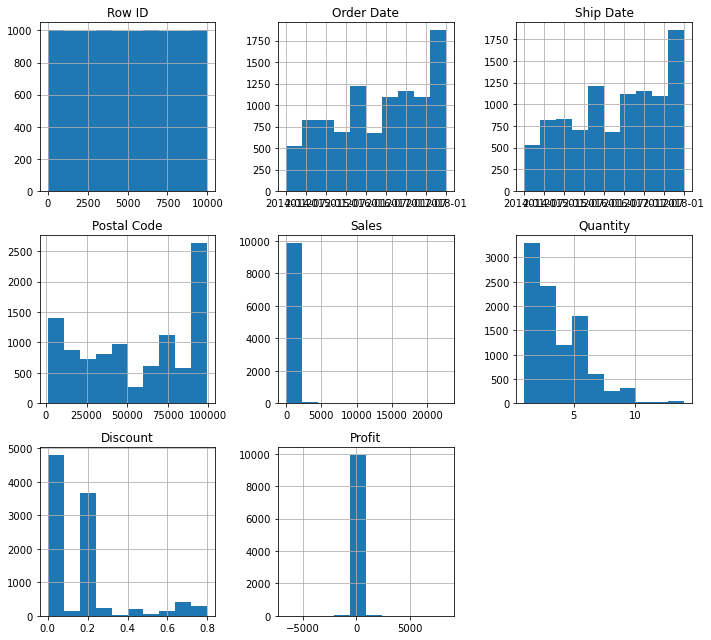

In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt
df.hist(figsize=(10, 9))
plt.tight_layout() 
plt.show()

In [9]:
#상이한 행동 패턴을 찾고 집단 분석

#지역
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [10]:
#고객분포
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [11]:
#연령분포


In [12]:
#고객분포
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [13]:
#마진에 따른 아이템 분류

In [14]:
#1) 동질 집단 유형


In [15]:
#2) 동질 집단 크기
#‘일별‘, ‘주별‘, ‘월별‘ 세 개의 집단 크기에서 선택

In [16]:
#3) 측정항목(Metrics)
#기본값으로 ‘사용자 유지율'(재방문한 사용자 비율)이 표시됨. 사용자당, 유지, 합계 세 개 카테고리 내 총 14개 측정항목 선택 가능

### UserId별 첫 주문일자 추출

In [ ]:
df['Order Date'].head()

In [17]:
#2.시리즈의 dt accessor를 적용하여 시계열 데이터 처리
df['OrderPeriod']=df['Order Date'].dt.strftime('%Y-%m')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,OrderPeriod
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016-11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016-11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016-06
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015-10
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015-10


In [18]:
#3.유저의 첫번째 주문을 토대로 유저별 코호트 그룹 설정
#각각의 raw에 고객ID별 첫 번째 주문일자를 추가
#set_index함수를 사용하여 데이터프레임의 인덱스를 지정
df.set_index('Customer ID',inplace=True)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,OrderPeriod
Customer ID,,,,,,,,,,,,,,,,,,,,,
CG-12520,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016-11
CG-12520,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016-11
DV-13045,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016-06
SO-20335,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015-10
SO-20335,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015-10


In [19]:
#set_index함수를 사용한 데이터프레임을 groupby함수로 그룹화
FirstOrder=df.groupby(df.index)['Order Date'].min()
FirstOrder.head()

Customer ID
AA-10315   2014-03-31
AA-10375   2014-04-21
AA-10480   2014-05-04
AA-10645   2014-06-22
AB-10015   2014-02-18
Name: Order Date, dtype: datetime64[ns]

In [20]:
#코호트 분석의 기준은 월 단위이므로 dt accessor에 "%Y-%m"을 전달하여 데이터를 년-월로 변경
FirstOrder=FirstOrder.dt.strftime('%Y-%m')
FirstOrder.head()

Customer ID
AA-10315    2014-03
AA-10375    2014-04
AA-10480    2014-05
AA-10645    2014-06
AB-10015    2014-02
Name: Order Date, dtype: object

In [21]:
#FirstOrder 칼럼을 추가 raw에 첫 주문일자가 입력
df['FirstOrder']=FirstOrder
df.reset_index(inplace=True)
df.head()

,Customer ID,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,OrderPeriod,FirstOrder
0,CG-12520,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016-11,2015-10
1,CG-12520,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016-11,2015-10
2,DV-13045,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016-06,2016-06
3,SO-20335,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015-10,2015-10
4,SO-20335,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015-10,2015-10


### 4. 코호트 그룹과 주문기간으로 데이터 집계하기


In [22]:
#순방문자(UV)로 집계
#고객이 여러번 방문했다 하더라도 한 번으로 집계하게 되어 월별 순방문자수를 파악할 수 있음
grouped = df.groupby(['FirstOrder', 'OrderPeriod'])

In [23]:
#reset_index함수를 사용한 데이터프레임을 살펴보면 
#FirstOrder, OrderPeriod, UserId 칼럼으로 구성되어 있는 것을 살펴볼 수 있음
cohorts=grouped['Customer ID'].nunique()
cohorts.head()

FirstOrder  OrderPeriod
2014-01     2014-01        32
            2014-02         3
            2014-04         2
            2014-05         2
            2014-07         2
Name: Customer ID, dtype: int64

In [24]:
cohorts=cohorts.reset_index()
cohorts.head()

,FirstOrder,OrderPeriod,Customer ID
0,2014-01,2014-01,32
1,2014-01,2014-02,3
2,2014-01,2014-04,2
3,2014-01,2014-05,2
4,2014-01,2014-07,2


In [25]:
cohorts.rename({'Customer ID':'TotalUsers'},axis=1,inplace=True)
cohorts.head()

,FirstOrder,OrderPeriod,TotalUsers
0,2014-01,2014-01,32
1,2014-01,2014-02,3
2,2014-01,2014-04,2
3,2014-01,2014-05,2
4,2014-01,2014-07,2


In [26]:
each_period=cohorts['FirstOrder'].value_counts().sort_index()
each_period

2014-01    44
2014-02    42
2014-03    45
2014-04    45
2014-05    44
2014-06    43
2014-07    39
2014-08    41
2014-09    40
2014-10    39
2014-11    37
2014-12    37
2015-01    23
2015-02    19
2015-03    31
2015-04    23
2015-05    26
2015-06    26
2015-07    19
2015-08    21
2015-09    25
2015-10    17
2015-11    17
2015-12    21
2016-01    17
2016-02     8
2016-03    18
2016-04    14
2016-05    17
2016-06    14
2016-07     3
2016-08     9
2016-10     6
2016-11     8
2016-12     3
2017-03     5
2017-04     1
2017-06     2
2017-07     2
2017-09     1
2017-10     1
2017-11     1
Name: FirstOrder, dtype: int64

In [31]:
cohorts[cohorts['FirstOrder']=='2014-02']

,FirstOrder,OrderPeriod,TotalUsers
44,2014-02,2014-02,24.0
45,2014-02,2014-03,4.0
46,2014-02,2014-04,2.0
47,2014-02,2014-05,1.0
48,2014-02,2014-07,2.0
49,2014-02,2014-08,2.0
50,2014-02,2014-09,3.0
51,2014-02,2014-10,3.0
52,2014-02,2014-11,4.0
53,2014-02,2014-12,4.0


In [32]:
cohorts.loc[cohorts.shape[0],'FirstOrder']='2014-02'
cohorts.loc[cohorts.shape[0]-1,'OrderPeriod']='2015-03'
cohorts.loc[cohorts.shape[0]-1,'TotalUsers']=0
cohorts.sort_values(['FirstOrder','OrderPeriod'],inplace=True)

In [33]:
each_period=cohorts['FirstOrder'].value_counts().sort_index()
each_period

2009-02     1
2014-01    44
2014-02    43
2014-03    45
2014-04    45
2014-05    44
2014-06    43
2014-07    39
2014-08    41
2014-09    40
2014-10    39
2014-11    37
2014-12    37
2015-01    23
2015-02    19
2015-03    31
2015-04    23
2015-05    26
2015-06    26
2015-07    19
2015-08    21
2015-09    25
2015-10    17
2015-11    17
2015-12    21
2016-01    17
2016-02     8
2016-03    18
2016-04    14
2016-05    17
2016-06    14
2016-07     3
2016-08     9
2016-10     6
2016-11     8
2016-12     3
2017-03     5
2017-04     1
2017-06     2
2017-07     2
2017-09     1
2017-10     1
2017-11     1
Name: FirstOrder, dtype: int64

In [34]:
cohortperiod=[]

for x in each_period: 
    for y in range(x):
        cohortperiod.append(y)

In [35]:
cohorts['CohortPeriod']=cohortperiod
cohorts.head(20)

,FirstOrder,OrderPeriod,TotalUsers,CohortPeriod
894,2009-02,2010-03,0.0,0
0,2014-01,2014-01,32.0,0
1,2014-01,2014-02,3.0,1
2,2014-01,2014-04,2.0,2
3,2014-01,2014-05,2.0,3
4,2014-01,2014-07,2.0,4
5,2014-01,2014-08,4.0,5
6,2014-01,2014-09,5.0,6
7,2014-01,2014-10,3.0,7
8,2014-01,2014-11,7.0,8


In [36]:
cohorts.set_index(['FirstOrder','CohortPeriod'],inplace=True)
cohorts.head()

OrderPeriod  TotalUsers
FirstOrder CohortPeriod                        
2009-02    0                2010-03         0.0
2014-01    0                2014-01        32.0
           1                2014-02         3.0
           2                2014-04         2.0
           3                2014-05         2.0

In [37]:
cohorts=cohorts['TotalUsers'].unstack(1)
cohorts

CohortPeriod,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
FirstOrder,,,,,,,,,,,,,,,,,,,,,
2009-02,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01,32.0,3.0,2.0,2.0,2.0,4.0,5.0,3.0,7.0,5.0,...,4.0,5.0,4.0,1.0,2.0,9.0,9.0,10.0,6.0,NaN
2014-02,24.0,4.0,2.0,1.0,2.0,2.0,3.0,3.0,4.0,4.0,...,2.0,5.0,3.0,3.0,4.0,6.0,6.0,3.0,NaN,NaN
2014-03,65.0,4.0,2.0,8.0,7.0,7.0,5.0,8.0,6.0,1.0,...,6.0,12.0,13.0,10.0,12.0,6.0,19.0,8.0,18.0,16.0
2014-04,56.0,6.0,2.0,4.0,3.0,8.0,6.0,9.0,8.0,1.0,...,14.0,3.0,11.0,5.0,7.0,8.0,15.0,8.0,14.0,14.0
2014-05,56.0,5.0,5.0,4.0,10.0,2.0,12.0,10.0,4.0,3.0,...,5.0,4.0,11.0,7.0,6.0,16.0,7.0,17.0,9.0,NaN
2014-06,48.0,1.0,2.0,4.0,2.0,9.0,8.0,1.0,4.0,6.0,...,9.0,9.0,5.0,3.0,13.0,7.0,14.0,11.0,NaN,NaN
2014-07,44.0,6.0,5.0,5.0,8.0,2.0,8.0,2.0,7.0,7.0,...,11.0,10.0,13.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-08,49.0,8.0,3.0,11.0,5.0,3.0,4.0,2.0,4.0,3.0,...,9.0,8.0,9.0,12.0,11.0,10.0,NaN,NaN,NaN,NaN


In [38]:
user_retention=cohorts.divide(cohorts[0],axis=0)
user_retention

CohortPeriod,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
FirstOrder,,,,,,,,,,,,,,,,,,,,,
2009-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01,1.0,0.093750,0.062500,0.062500,0.062500,0.125000,0.156250,0.093750,0.218750,0.156250,...,0.125000,0.156250,0.125000,0.031250,0.062500,0.281250,0.281250,0.312500,0.187500,NaN
2014-02,1.0,0.166667,0.083333,0.041667,0.083333,0.083333,0.125000,0.125000,0.166667,0.166667,...,0.083333,0.208333,0.125000,0.125000,0.166667,0.250000,0.250000,0.125000,NaN,NaN
2014-03,1.0,0.061538,0.030769,0.123077,0.107692,0.107692,0.076923,0.123077,0.092308,0.015385,...,0.092308,0.184615,0.200000,0.153846,0.184615,0.092308,0.292308,0.123077,0.276923,0.246154
2014-04,1.0,0.107143,0.035714,0.071429,0.053571,0.142857,0.107143,0.160714,0.142857,0.017857,...,0.250000,0.053571,0.196429,0.089286,0.125000,0.142857,0.267857,0.142857,0.250000,0.250000
2014-05,1.0,0.089286,0.089286,0.071429,0.178571,0.035714,0.214286,0.178571,0.071429,0.053571,...,0.089286,0.071429,0.196429,0.125000,0.107143,0.285714,0.125000,0.303571,0.160714,NaN
2014-06,1.0,0.020833,0.041667,0.083333,0.041667,0.187500,0.166667,0.020833,0.083333,0.125000,...,0.187500,0.187500,0.104167,0.062500,0.270833,0.145833,0.291667,0.229167,NaN,NaN
2014-07,1.0,0.136364,0.113636,0.113636,0.181818,0.045455,0.181818,0.045455,0.159091,0.159091,...,0.250000,0.227273,0.295455,0.204545,NaN,NaN,NaN,NaN,NaN,NaN
2014-08,1.0,0.163265,0.061224,0.224490,0.102041,0.061224,0.081633,0.040816,0.081633,0.061224,...,0.183673,0.163265,0.183673,0.244898,0.224490,0.204082,NaN,NaN,NaN,NaN


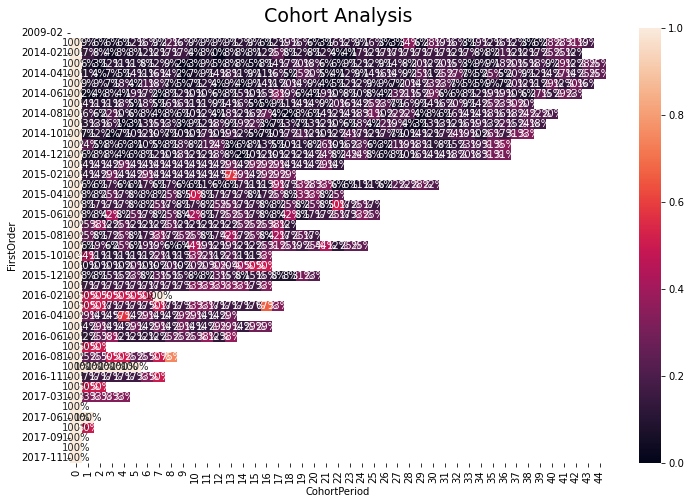

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.figure(figsize=(12, 8))
plt.title('Cohort Analysis', fontsize=19)
sns.heatmap(user_retention, annot=True, fmt='.0%')
plt.show()